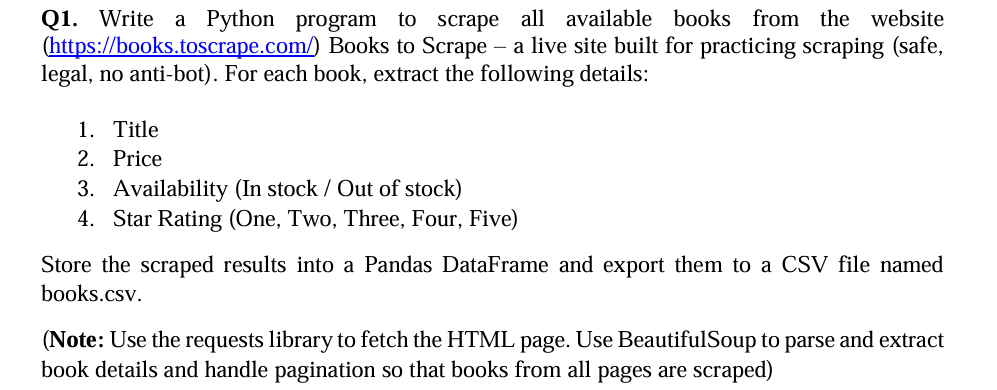

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://books.toscrape.com/catalogue/page-{}.html"

books_data = []

page = 1
while True:
    url = base_url.format(page)
    response = requests.get(url)

    if response.status_code != 200:
        break

    soup = BeautifulSoup(response.text, 'html.parser')

    books = soup.find_all('article', class_='product_pod')

    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text
        availability = book.find('p', class_='instock availability').text.strip()
        star_rating = book.p['class'][1]

        books_data.append({
            'Title': title,
            'Price': price,
            'Availability': availability,
            'Star Rating': star_rating
        })

    print(f"Page {page} done...")
    page += 1

df = pd.DataFrame(books_data)

df.to_csv('books.csv', index=False)



Page 1 done...
Page 2 done...
Page 3 done...
Page 4 done...
Page 5 done...
Page 6 done...
Page 7 done...
Page 8 done...
Page 9 done...
Page 10 done...
Page 11 done...
Page 12 done...
Page 13 done...
Page 14 done...
Page 15 done...
Page 16 done...
Page 17 done...
Page 18 done...
Page 19 done...
Page 20 done...
Page 21 done...
Page 22 done...
Page 23 done...
Page 24 done...
Page 25 done...
Page 26 done...
Page 27 done...
Page 28 done...
Page 29 done...
Page 30 done...
Page 31 done...
Page 32 done...
Page 33 done...
Page 34 done...
Page 35 done...
Page 36 done...
Page 37 done...
Page 38 done...
Page 39 done...
Page 40 done...
Page 41 done...
Page 42 done...
Page 43 done...
Page 44 done...
Page 45 done...
Page 46 done...
Page 47 done...
Page 48 done...
Page 49 done...
Page 50 done...


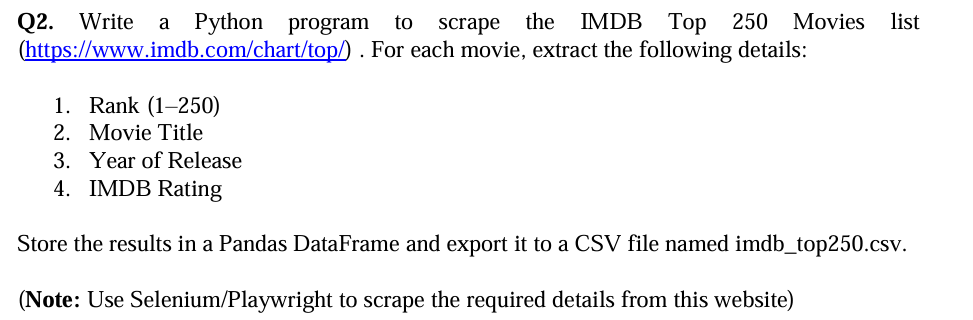

In [1]:
!pip install selenium
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time

chrome_opts = Options()
chrome_opts.add_argument("--headless")
chrome_opts.add_argument("--no-sandbox")
chrome_opts.add_argument("--disable-dev-shm-usage")

chrome_opts.add_argument(
    "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) "
    "Chrome/115.0.0.0 Safari/537.36"
)

browser = webdriver.Chrome(options=chrome_opts)

browser.get("https://www.imdb.com/chart/top/")
time.sleep(5)

film_list = []
movie_cards = browser.find_elements(By.CSS_SELECTOR, ".ipc-metadata-list-summary-item")

for rank, card in enumerate(movie_cards, start=1):
    try:
        name = card.find_element(By.CSS_SELECTOR, "h3").text
        release_year = card.find_element(By.CSS_SELECTOR, ".cli-title-metadata-item").text
        score = card.find_element(By.CSS_SELECTOR, ".ipc-rating-star--imdb").text.split()[0]
        film_list.append([rank, name, release_year, score])
    except Exception as e:
        print(f"skipping due to error: {e}")

browser.quit()

imdb_table = pd.DataFrame(film_list, columns=["Position", "Movie", "Release Year", "Rating"])
imdb_table.to_csv("imdb_top250.csv", index=False)
print(imdb_table.head())


   Position                        Movie Release Year Rating
0         1  1. The Shawshank Redemption         1994    9.3
1         2             2. The Godfather         1972    9.2
2         3           3. The Dark Knight         2008    9.1
3         4     4. The Godfather Part II         1974    9.0
4         5              5. 12 Angry Men         1957    9.0


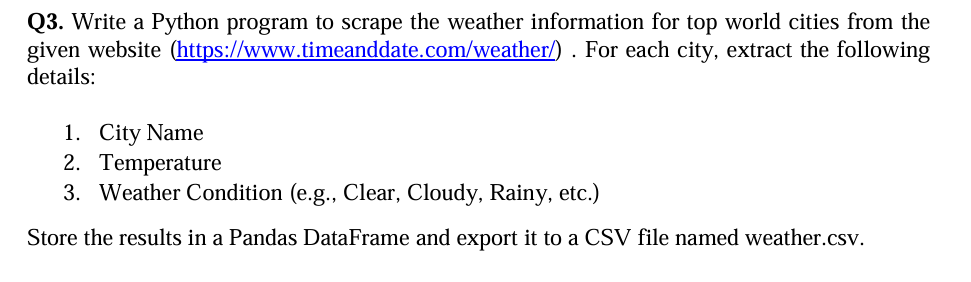

In [2]:
!pip install selenium
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time

chrome_opts = Options()
chrome_opts.add_argument("--headless")
chrome_opts.add_argument("--no-sandbox")
chrome_opts.add_argument("--disable-dev-shm-usage")

chrome_opts.add_argument(
    "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) "
    "Chrome/115.0.0.0 Safari/537.36"
)

browser = webdriver.Chrome(options=chrome_opts)

browser.get("https://www.timeanddate.com/weather/?sort=1&low=4")
time.sleep(5)

weather_list = []
weather_rows = browser.find_elements(By.CSS_SELECTOR, "table.zebra.fw.tb-theme tbody tr")

for row in weather_rows:
    try:
        city_name = row.find_element(By.CSS_SELECTOR, "td:nth-child(1)").text
        cond_td = row.find_element(By.CSS_SELECTOR, "td:nth-child(3)")
        condition_img = cond_td.find_element(By.TAG_NAME, "img")
        condition = condition_img.get_attribute("title")
        temperature = row.find_element(By.CSS_SELECTOR, "td:nth-child(4)").text
        weather_list.append([city_name, condition, temperature])
    except Exception as e:
        print(f"skipping due to error: {e}")

browser.quit()

weather = pd.DataFrame(weather_list, columns=["City_Name", "Condition", "Temperature"])
weather.to_csv("weather.csv", index=False)
print(weather.head())


                           City_Name              Condition Temperature
0                  Albania, Tirana *           Sunny. Mild.       73 °F
1                   Algeria, Algiers           Sunny. Mild.       74 °F
2                     Angola, Luanda             Fog. Mild.       70 °F
3  Antigua and Barbuda, Saint John's  Passing clouds. Warm.       81 °F
4            Argentina, Buenos Aires           Clear. Cool.       57 °F
